<a href="https://colab.research.google.com/github/gclausen0272/DataCamp-/blob/main/hackathon1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Homework</h1>
Your homework is to specify a simple optimization problem that you will solve with gradient descent (as above). Then, play around with the learning rate and number of update iterations to get an intuitive understanding of how they affect your solver. Write up a paragraph describing your equation, how learning rate and number of iterations gave a better or worse solution, and with your intuition for why. Submit this writeup in a .pdf with a .py of your code.

I'm expecting this to take about an hour (or less if you're experienced). Feel free to use any code from this or previous hackathons. If you don't understand how to do any part of this or if it's taking you longer than that, please let me know in office hours or by email (both can be found on the syllabus). I'm also happy to discuss if you just want to ask more questions about anything in this notebook!

<h1> simple optimization</h1>
The simple optimization problem that I elected to do was classifying irises.  Secifically I wanted to classify setoasas vs versicolors based on sepal length and petal length. I decided to do the linearlly separable two flower types instead of a traditional equation. 

*note* my solver is functionally the same as the example however I added a relu activation function, thus there would be one more step chained in the backward propagation stage. 

<h1> Learning rate</h1> 
A higher learning rate will cause the algorithm to converge faster, requireing fewer epochs to approach the training data's corect answer, however the drawback is that it lower percision, thus you could quickly over correct The first example here, we use a rate of .01, you can see a gentle slope and that the decision point isnt properly set yet, however when given enough steps as demonstrated below (200 in this case) it will converge on the correct answer 


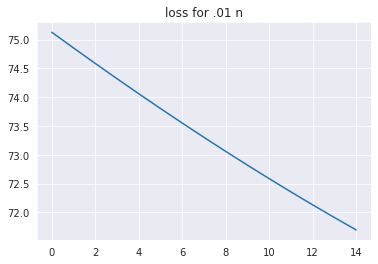

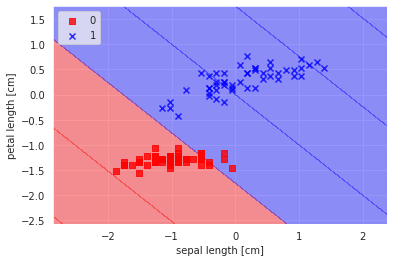

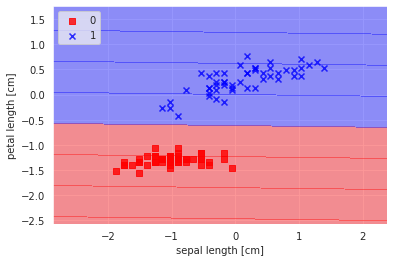

In [ ]:
#@title
p = Perceptron(tf.convert_to_tensor(X.astype("float32")), .01,tf.convert_to_tensor(y.astype("float32")),tf.Variable(tf.ones([2, 1])))
p.train(15, False)
plt.title("loss for .01 n")
p.plot()
plot_decision_regions(X, y, classifier=p)
p = Perceptron(tf.convert_to_tensor(X.astype("float32")), .01,tf.convert_to_tensor(y.astype("float32")),tf.Variable(tf.ones([2, 1])))
p.train(200, False)
plot_decision_regions(X, y, classifier=p)


Here we use a rate of .1, withthis and 10 steps we have already converged at the correct decision boundry indicating we can reach it a lot faster than with a smaller number 

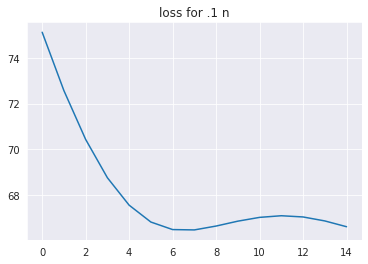

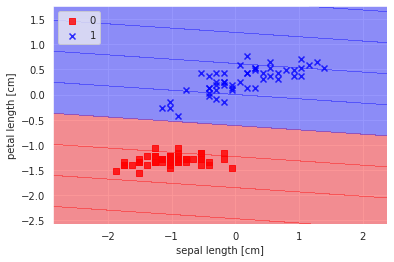

In [ ]:
#@title
p = Perceptron(tf.convert_to_tensor(X.astype("float32")), .1,tf.convert_to_tensor(y.astype("float32")),tf.Variable(tf.ones([2, 1])))
plt.title("loss for .1 n")

p.train(15, False)
p.plot()
plot_decision_regions(X, y, classifier=p)


Finally, with a very high learning rate you can see with a few steps we have already missed the mark! Because the learning rate is so high, the loss is quite turbulent 

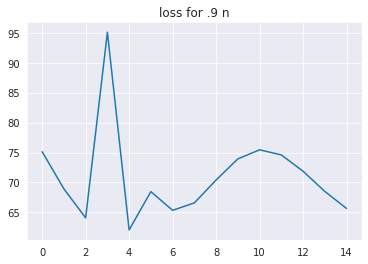

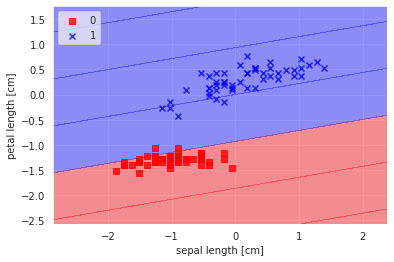

In [ ]:
#@title
plt.title("loss for .9 n")

p = Perceptron(tf.convert_to_tensor(X.astype("float32")), .9,tf.convert_to_tensor(y.astype("float32")),tf.Variable(tf.ones([2, 1])))
p.train(15, False)
p.plot()
plot_decision_regions(X, y, classifier=p)


<h1> number of iterations</h1>
As heavily implied above, the more iterations we give our perceptron, the tighter the fit! IT will more closely reflect the training data, however this is a risk of it becoming overfit, picking up on noise if we run it too many times.

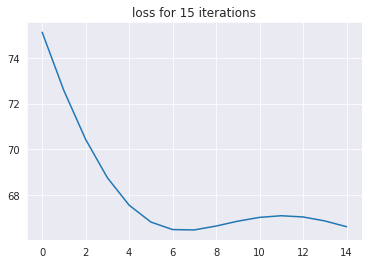

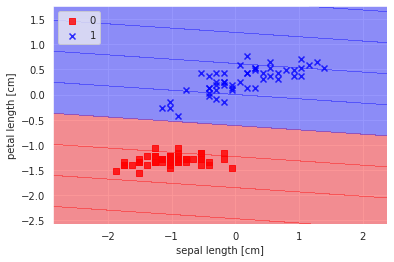

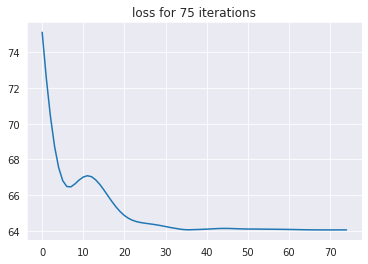

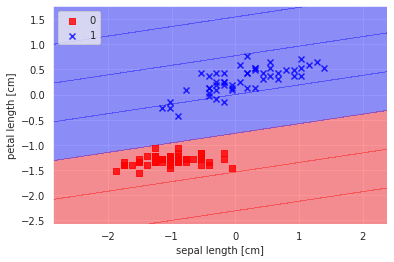

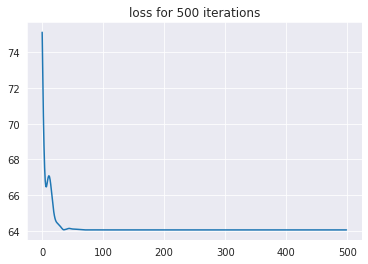

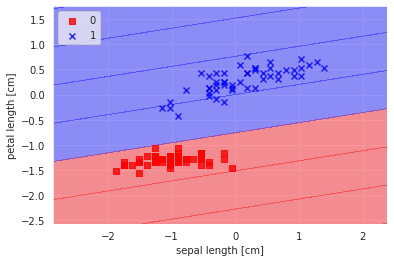

In [ ]:
#@title
p = Perceptron(tf.convert_to_tensor(X.astype("float32")), .1,tf.convert_to_tensor(y.astype("float32")),tf.Variable(tf.ones([2, 1])))
plt.title("loss for 15 iterations")
p.train(15, False)
p.plot()
plot_decision_regions(X, y, classifier=p)

p = Perceptron(tf.convert_to_tensor(X.astype("float32")), .1,tf.convert_to_tensor(y.astype("float32")),tf.Variable(tf.ones([2, 1])))
plt.title("loss for 75 iterations")
p.train(75, False)
p.plot()
plot_decision_regions(X, y, classifier=p)


p = Perceptron(tf.convert_to_tensor(X.astype("float32")), .1,tf.convert_to_tensor(y.astype("float32")),tf.Variable(tf.ones([2, 1])))
plt.title("loss for 500 iterations")
p.train(500, False)
p.plot()
plot_decision_regions(X, y, classifier=p)

<h1>Utilities</h1>

In [5]:
import numpy as np 
import tensorflow as tf  
import matplotlib.pyplot as plt

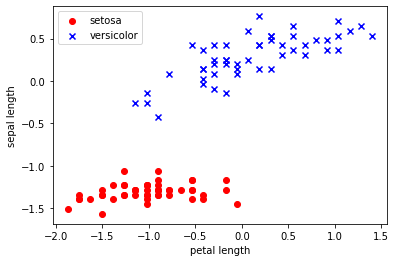

In [7]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
from sklearn.preprocessing import StandardScaler
df_s = df.copy()
std_scaler = StandardScaler()
df_s.iloc[:, [0, 1, 2, 3]] = std_scaler.fit_transform(df_s.iloc[:, [0, 1, 2, 3]])
df = df_s
y = np.where(df.iloc[0:100, 4].values == 'Iris-setosa', 0, 1)
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.plot()
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()
Xfin = []
for i in range(len(X)):
  t = list(X[i])
  t.append(1)
  Xfin.append(t)

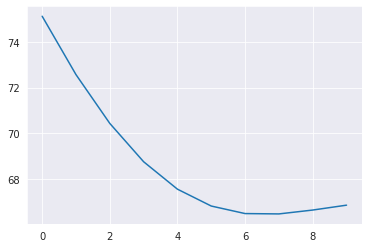

[[0.16727778]
 [0.31188586]]


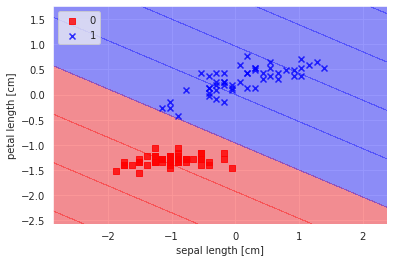

In [ ]:
p = Perceptron(tf.convert_to_tensor(X.astype("float32")), .1,tf.convert_to_tensor(y.astype("float32")),tf.Variable(tf.ones([2, 1])))
p.train(10, False)
p.plot()
print(p.getWeights())
plot_decision_regions(X, y, classifier=p)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

class Perceptron:
  """ 
    creating a perceptron class which contains 
      train_data: inputed training data
      learning_rate: the learning rate
      y: expected output 
      weights: current value of the weights 
  """
  def __init__(self, train_data, learning_rate, y, weights):
    self.A = train_data
    self.learning_rate = learning_rate 
    self.b = y
    self.x = weights
    self.optimizer = tf.keras.optimizers.Adam(learning_rate)
    self.losses = []

  def train(self, num_iterations, show):
      for step in range(num_iterations):
          # print("Iteration", step)
          with tf.GradientTape() as tape:
              # Calculate A*x
              product = tf.matmul(self.A, self.x)
              # product = tf.math.tanh(product)
              product = tf.keras.activations.relu(product)
              # product = tf.math.sin(product)
              # calculat the loss value we want to minimize
              # what happens if we don't use the square here?
              difference_sq = tf.math.square(product - self.b)
              self.losses.append(tf.norm(tf.math.sqrt(difference_sq)).numpy())
              # print(difference_sq)
              # calculate the gradient
              grad = tape.gradient(difference_sq, [self.x])
              # print(grad)
              # print("Gradients:")
              # print(grad)
              # update x
              self.optimizer.apply_gradients(zip(grad, [self.x]))
              if show:
                print("Squared error:", tf.norm(tf.math.sqrt(difference_sq)).numpy())
                print(self.x.numpy())
                plot_decision_regions(np.array(self.A), np.array(self.b), classifier=self)
              # print()

  def getWeights(self):
    return self.x.numpy()
  def predict(self, A):
    return  (A @ self.x).numpy()
  def plot(self, h=0.01):
    plt.plot(range(len(self.losses)),self.losses)
    plt.show()


In [ ]:
#@title
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   pp = np.array([xx1.ravel(), xx2.ravel()]).T
   Z = classifier.predict(pp)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)
    # plot_decision_regions(X, y, classifier=p)
   plt.xlabel('sepal length [cm]')
   plt.ylabel('petal length [cm]')
   plt.legend(loc='upper left')
   plt.show()